<a href="https://colab.research.google.com/github/yash11-web/html-self/blob/main/modelbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [ ]:
ROOT_DIR="/content/BrainTumorData/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('Brain Tumor', 701), ('.ipynb_checkpoints', 0), ('Healthey', 701)])

In [ ]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)

   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+p+"/"+dir)

     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(70/100*number_of_images[dir])-5),
                                replace=False):
       O=os.path.join(ROOT_DIR,dir,img)
       D=os.path.join("./"+p,dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{p}folder exists")

In [ ]:
dataFolder("train",0.7)

trainfolder exists


In [ ]:
dataFolder("val",0.5)

valfolder exists


In [ ]:
dataFolder("test",0.5)

testfolder exists


In [ ]:
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Brain Tumor', 701), ('.ipynb_checkpoints', 0), ('Healthey', 701)])

Model Build

In [ ]:
from keras.src.utils.image_utils import img_to_array
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#cnn model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 64)      20800     
                                                                 
 conv2d_3 (Conv2D)           (None, 218, 218, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 109, 109, 128)     0         
                                                        

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

preaparing our data using data generator

In [ ]:
def preprocessingImages1(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/225,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image


In [ ]:
path="/content/train"
train_data = preprocessingImages1(path)

Found 802 images belonging to 3 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(rescale=1/225)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path="/content/test"
test_data = preprocessingImages2(path)

Found 689 images belonging to 3 classes.


In [ ]:
path="/content/val"
val_data = preprocessingImages2(path)

Found 802 images belonging to 3 classes.


In [ ]:
#early sttoping and model check point
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')
#model checkpoint
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]


model training

In [ ]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,
                       validation_steps=16,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -737291584.0000 - accuracy: 0.5221 
Epoch 1: val_accuracy improved from -inf to 0.47266, saving model to ./bestmodel.h5
8/8 [==============================] - 338s 44s/step - loss: -737291584.0000 - accuracy: 0.5221 - val_loss: -1512057728.0000 - val_accuracy: 0.4727
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: -2437101056.0000 - accuracy: 0.4844 
Epoch 2: val_accuracy improved from 0.47266 to 0.50195, saving model to ./bestmodel.h5
8/8 [==============================] - 327s 43s/step - loss: -2437101056.0000 - accuracy: 0.4844 - val_loss: -3817854976.0000 - val_accuracy: 0.5020
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -6175268352.0000 - accuracy: 0.5310 
Epoch 3: val_accuracy did not improve from 0.50195
8/8 [==============================] - 326s 43s/step - loss: -6175268352.0000 - accuracy: 0.5310 - val_loss: -10146879488.0000 - val_accuracy: 0.4941
Epoch 4/30
8/8 [=======

model grphical interpretion

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

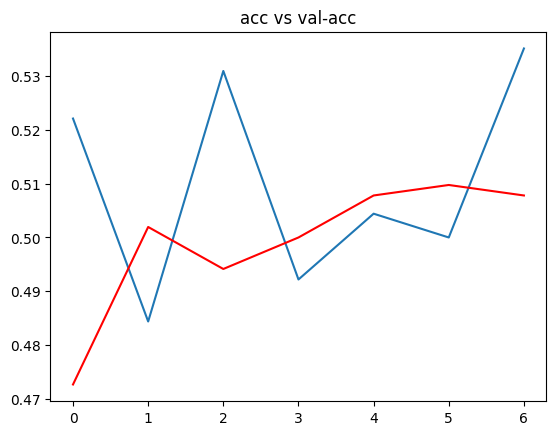

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs val-acc")
plt.show()

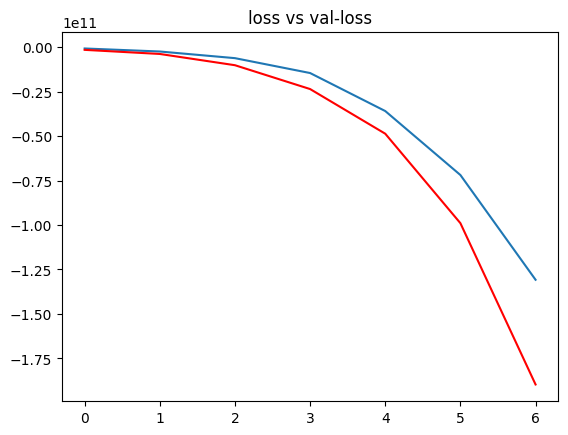

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs val-loss")
plt.show()

In [ ]:
#model accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.h5")


**model accuracy**

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")

KeyboardInterrupt: ignored

In [ ]:
from keras.preprocessing.image import load_img,img_to_array

The MRI is having a Tumor


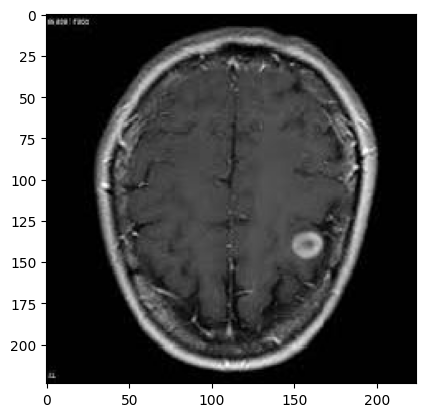

In [ ]:
path="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/y114.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict_generator(input_arr)[0][0]
pred
if pred==1:
  print("The MRI is having a Tumor")
elif pred==2:
  print("The MRI is not having Tumor")
else:
  print("The MRI is not having Tumor")

In [ ]:
train_data.class_indices


{'.ipynb_checkpoints': 0, 'Brain Tumor': 1, 'Healthey': 2}